# Examining risk factors associated with CVE

> using CVE metadata retrieved from local instance of [CVE Search](https://github.com/cve-search/cve-search)
> with the help of `dependency_search/retrieve_cve_info.py` script

See [MSR 2023 CVE](https://docs.google.com/spreadsheets/d/1yUXKMNrwUA4t0wH4_c8kVLwmEKmOGjt9sj_nHUofmGo) Google Sheet

Imports

In [1]:
import pandas as pd

## Exploring `data/unique_cve_info-cvss_cwe_etc.parquet`

In [2]:
df_filename='../../data/unique_cve_info-cvss_cwe_etc.parquet'
df_filename

'../../data/unique_cve_info-cvss_cwe_etc.parquet'

In [3]:
df=pd.read_parquet(df_filename)
df

,cve,cvss,cwe,error,cvss-vector,access.authentication,access.complexity,access.vector,impact.availability,impact.confidentiality,impact.integrity
0,CVE-2014-2972,4.6,CWE-189,<NA>,AV:L/AC:L/Au:N/C:P/I:P/A:P,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL
1,CVE-2014-3470,4.3,CWE-310,<NA>,AV:N/AC:M/Au:N/C:N/I:N/A:P,NONE,MEDIUM,NETWORK,PARTIAL,NONE,NONE
2,CVE-2013-2231,7.2,CWE-399,<NA>,AV:L/AC:L/Au:N/C:C/I:C/A:C,NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE
3,CVE-2012-4405,6.8,CWE-189,<NA>,AV:N/AC:M/Au:N/C:P/I:P/A:P,NONE,MEDIUM,NETWORK,PARTIAL,PARTIAL,PARTIAL
4,CVE-2016-0728,7.2,NVD-CWE-Other,<NA>,AV:L/AC:L/Au:N/C:C/I:C/A:C,NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
65926,CVE-2022-22332,5.0,CWE-672,<NA>,AV:N/AC:L/Au:N/C:N/I:P/A:N,NONE,LOW,NETWORK,NONE,NONE,PARTIAL
65927,CVE-2022-22327,5.0,CWE-327,<NA>,AV:N/AC:L/Au:N/C:P/I:N/A:N,NONE,LOW,NETWORK,NONE,PARTIAL,NONE
65928,CVE-2021-43257,6.0,CWE-1236,<NA>,AV:N/AC:M/Au:S/C:P/I:P/A:P,SINGLE,MEDIUM,NETWORK,PARTIAL,PARTIAL,PARTIAL
65929,CVE-2021-43286,6.5,CWE-77,<NA>,AV:N/AC:L/Au:S/C:P/I:P/A:P,SINGLE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL


In [4]:
df.shape

(65931, 11)

In [5]:
df.columns

Index(['cve', 'cvss', 'cwe', 'error', 'cvss-vector', 'access.authentication',
       'access.complexity', 'access.vector', 'impact.availability',
       'impact.confidentiality', 'impact.integrity'],
      dtype='object')

In [20]:
cvss_factor_columns=[column_name for column_name in df.columns if "." in column_name]
cvss_factor_columns

['access.authentication',
 'access.complexity',
 'access.vector',
 'impact.availability',
 'impact.confidentiality',
 'impact.integrity']

In [12]:
df['error'].unique()

<StringArray>
[<NA>, "'cvss'"]
Length: 2, dtype: string

In [31]:
df.value_counts('error')

error
'cvss'    2766
dtype: int64

In [32]:
df['error'].dropna()

147      'cvss'
469      'cvss'
493      'cvss'
595      'cvss'
641      'cvss'
          ...  
65900    'cvss'
65901    'cvss'
65902    'cvss'
65906    'cvss'
65911    'cvss'
Name: error, Length: 2766, dtype: string

### The Common Vulnerability Scoring System (CVSS), and CVSS Ratings

See https://nvd.nist.gov/vuln-metrics/cvss<br>
See https://www.first.org/cvss/specification-document#Qualitative-Severity-Rating-Scale

In [6]:
df['cvss'].describe()

count    63165.000000
mean         5.784938
std          1.950292
min          0.000000
25%          4.300000
50%          5.000000
75%          7.200000
max         10.000000
Name: cvss, dtype: float64

CVSS v2.0 Ratings

https://nvd.nist.gov/vuln-metrics/cvss

- Low	    : 0.0-3.9 
- Medium	: 4.0-6.9 
- High	    : 7.0-10.0 

In [38]:
cvss2r_s = pd.cut(df['cvss'],
                  bins=[0,4,7,10.1],right=False,include_lowest=True,
                  labels=['Low','Medium','High'])
df['CVSS v2.0 Ratings'] = cvss2r_s
df.value_counts('CVSS v2.0 Ratings')

CVSS v2.0 Ratings
Medium    39042
High      17453
Low        6670
dtype: int64

<AxesSubplot: xlabel='CVSS v2.0 Ratings', ylabel='CVEs'>

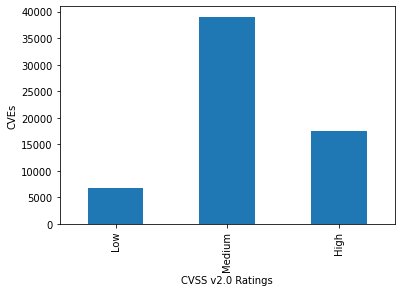

In [50]:
df.value_counts('CVSS v2.0 Ratings')[['Low','Medium','High']].plot.bar(ylabel='CVEs')

CVSS v3.1 Ratings

https://nvd.nist.gov/vuln-metrics/cvss<br>
https://www.first.org/cvss/specification-document#Qualitative-Severity-Rating-Scale

- None      : 0.0
- Low	    : 0.1-3.9 
- Medium	: 4.0-6.9 
- High	    : 7.0-8.9 
- Critical  : 9.0-10.0

In [46]:
cvss3r_s = pd.cut(df['cvss'],
                  bins=[0,0.1,4,7,9,10.1],right=False,include_lowest=True,
                  labels=['None','Low','Medium','High','Critical'])
df['CVSS v3.1 Ratings'] = cvss3r_s
df.value_counts('CVSS v3.1 Ratings')

CVSS v3.1 Ratings
Medium      39042
High        11075
Low          6666
Critical     6378
None            4
dtype: int64

<AxesSubplot: xlabel='CVSS v3.1 Ratings', ylabel='CVEs'>

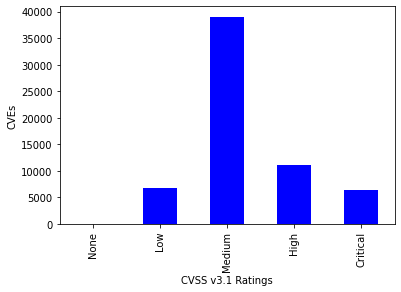

In [51]:
df.value_counts('CVSS v3.1 Ratings')[['None','Low','Medium','High','Critical']].plot(kind='bar', ylabel='CVEs',color='b')

### CVSS Factors: access.authentication, etc.

In [21]:
for col in cvss_factor_columns:
    print(f"{col}: {','.join(df[col].dropna().unique())}")

access.authentication: NONE,SINGLE,MULTIPLE
access.complexity: LOW,MEDIUM,HIGH
access.vector: LOCAL,NETWORK,ADJACENT_NETWORK
impact.availability: PARTIAL,COMPLETE,NONE
impact.confidentiality: PARTIAL,NONE,COMPLETE
impact.integrity: PARTIAL,NONE,COMPLETE


In [30]:
for col in cvss_factor_columns:
    print(df.value_counts(col))
    print('')

access.authentication
NONE        52800
SINGLE      10337
MULTIPLE       28
dtype: int64

access.complexity
LOW       35237
MEDIUM    25774
HIGH       2154
dtype: int64

access.vector
NETWORK             52249
LOCAL                9830
ADJACENT_NETWORK     1086
dtype: int64

impact.availability
PARTIAL     27809
NONE        21694
COMPLETE    13662
dtype: int64

impact.confidentiality
PARTIAL     29502
NONE        22813
COMPLETE    10850
dtype: int64

impact.integrity
PARTIAL     29439
NONE        23252
COMPLETE    10474
dtype: int64



In [66]:
df_impact=pd.DataFrame()
for col in ['impact.availability','impact.confidentiality','impact.integrity']:
    df_impact[col] = df.value_counts(col)
    
df_impact=df_impact.reindex(['NONE','PARTIAL','COMPLETE']).rename_axis(None, axis=1)
df_impact.index.name=None

df_impact

,impact.availability,impact.confidentiality,impact.integrity
NONE,21694,22813,23252
PARTIAL,27809,29502,29439
COMPLETE,13662,10850,10474


<AxesSubplot: >

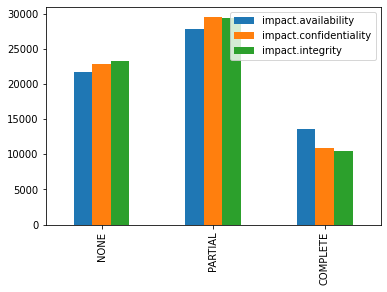

In [67]:
df_impact.plot.bar()

<AxesSubplot: >

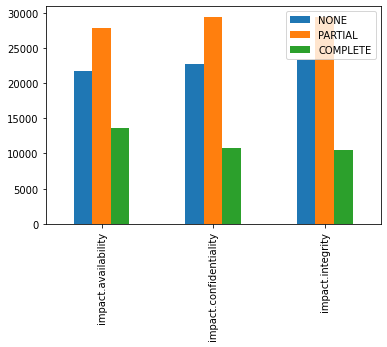

In [68]:
df_impact.transpose().plot.bar()

In [53]:
df.value_counts(subset=['impact.availability','impact.confidentiality','impact.integrity'])

impact.availability  impact.confidentiality  impact.integrity
PARTIAL              PARTIAL                 PARTIAL             16664
COMPLETE             COMPLETE                COMPLETE            10295
PARTIAL              NONE                    NONE                 9526
NONE                 PARTIAL                 NONE                 9374
                     NONE                    PARTIAL              9195
COMPLETE             NONE                    NONE                 3075
NONE                 PARTIAL                 PARTIAL              2575
PARTIAL              NONE                    PARTIAL               852
                     PARTIAL                 NONE                  743
NONE                 COMPLETE                NONE                  447
COMPLETE             PARTIAL                 PARTIAL                89
                     NONE                    COMPLETE               84
                     PARTIAL                 NONE                   53
NONE           